# IMPORT LIBRARIES

In [1]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drive.mount('/content/drive')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Mounted at /content/drive


# BUSINESS PROBLEM
- The company lacks a structured view of which products and categories are driving revenue and which are underperforming. Without this insight, decision-making around product optimization, pricing, and portfolio management becomes largely intuitive rather than data-driven.
- Sales trends and seasonal patterns are not clearly identified or analyzed. As a result, the company faces challenges in demand forecasting, inventory planning, and determining the right timing for promotions or operational adjustments.
- The company does not have sufficient visibility into customer value and purchasing behavior. There is no clear understanding of customer purchase frequency, spending patterns, or churn risk, making it difficult to design targeted retention and growth strategies.

# DATA UNDERSTANDING

### Database Schema

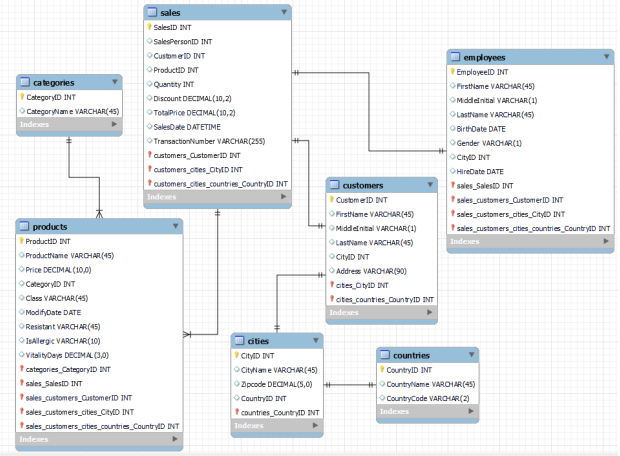

| Table Name               | Description                              |
|--------------------------|------------------------------------------|
| *sales.csv* **(main table)** | Contains transactional data for each sale|
| *customer.csv*               | Contains information about the customers who make purchases   |
| *products.csv*               | Stores details about the products being sold |
| *categories.csv*             | Defines the categories of the products       |
| *cities.csv*                 | Contains city-level geographic data          |
| *countries.csv*              | Stores country-related metadata              |
| *employees.csv*              | Stores details of employees handling sales transactions |

### Table Sales

In [3]:
df_sales = pd.read_csv('/content/drive/MyDrive/bootcampdibimbing+/Final Project Data Analysis/Project/data/raw_data/sales.csv')
df_sales.head(1)

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G


| Key    | Column Name          | Description                               |
|--------|----------------------|-------------------------------------------|
| **PK** | SalesID              | Unique identifier for each sale           |
| **FK** | SalesPersonID        | Employee responsible for the sale         |
| **FK** | CustomerID           | Customer making the purchase              |
| **FK** | ProductID            | Product being sold                        |
|        | Quantity             | Number of units sold                      |
|        | Discount             | Discount applied to the sale              |
|        | TotalPrice           | Final sale price after discounts          |
|        | SalesDate            | Date and time of the sale                 |
|        | TransctionNumber     | Unique identifier for the transaction     |

### Table Customers

In [4]:
df_customers = pd.read_csv('/content/drive/MyDrive/bootcampdibimbing+/Final Project Data Analysis/Project/data/raw_data/customers.csv')
df_customers.head(1)

,CustomerID,FirstName,MiddleInitial,LastName,CityID,Address
0,1,Stefanie,Y,Frye,79,97 Oak Avenue


| Key    | Column Name          | Description                               |
|--------|----------------------|-------------------------------------------|
| **PK** | CustomerID           | Unique identifier for each customer       |
|        | FirstName            | First name of the customer                |
|        | MiddleInitial        | Middle initial of the customer            |
|        | LastName             | Last name of the customer                 |
| **FK** | cityID               | City of the customer                      |
|        | Address              | Residential address of the customer       |

### Table Products

In [5]:
df_products = pd.read_csv('/content/drive/MyDrive/bootcampdibimbing+/Final Project Data Analysis/Project/data/raw_data/products.csv', delimiter=",")
df_products.head(1)

,ProductID,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays
0,1,Flour - Whole Wheat,74.2988,3,Medium,2018-02-16 08:21:49.190,Durable,Unknown,0.0


| Key    | Column Name          | Description                               |
|--------|----------------------|-------------------------------------------|
| **PK** | ProductID            | Unique identifier for each product        |
|        | ProductName          | Name of the product                       |
|        | Price                | Price per unit of the product             |
|        | CategoryID           | unique category identifier                |
|        | Class                | Classification of the product             |
|        | ModifyDate           | Last modified date                        |
|        | Resistant            | Product resistance category               |
|        | IsAllergic           | indicates whether the item is an allergen |
|        | VitalityDays	        | Product vital type classification         |

### Table Categories

In [6]:
df_categories = pd.read_csv('/content/drive/MyDrive/bootcampdibimbing+/Final Project Data Analysis/Project/data/raw_data/categories.csv')
df_categories.head(1)

,CategoryID,CategoryName
0,1,Confections


| Key    | Column Name          | Description                               |
|--------|----------------------|-------------------------------------------|
| **PK** | CategoryID           | Unique identifier for each product category|
|        | CategoryName         | Name of the product category              |

### Table Employees

In [7]:
df_employees = pd.read_csv('/content/drive/MyDrive/bootcampdibimbing+/Final Project Data Analysis/Project/data/raw_data/employees.csv')
df_employees.head(1)

,EmployeeID,FirstName,MiddleInitial,LastName,BirthDate,Gender,CityID,HireDate
0,1,Nicole,T,Fuller,1981-03-07 00:00:00.000,F,80,2011-06-20 07:15:36.920


| Key    | Column Name          | Description                               |
|--------|----------------------|-------------------------------------------|
| **PK** | EmployeeID           | Unique identifier for each employee       |
|        | FirstName            | First name of the employee                |
|        | MiddleInitial        | Middle initial of the employee            |
|        | LastName             | Last name of the employee                 |
|        | BirthDate            | Date of birth of the employee             |
|        | Gender               | Gender of the employee                    |
| **FK** | CityID               | unique identifier for city                |
|        | HireDate             | Date when the employee was hired          |

### Table Cities

In [8]:
df_cities = pd.read_csv('/content/drive/MyDrive/bootcampdibimbing+/Final Project Data Analysis/Project/data/raw_data/cities.csv')
df_cities.head(1)

,CityID,CityName,Zipcode,CountryID
0,1,Dayton,80563,32


| Key    | Column Name          | Description                               |
|--------|----------------------|-------------------------------------------|
| **PK** | CityID               | Unique identifier for each city           |
|        | CityName             | Name of the city                          |
|        | MiddleInitial        | Middle initial of the employee            |
|        | Zipcode              | Population of the city                    |
| **FK** | CountryID            | Reference to the corresponding country    |

### Table Countries

In [9]:
df_countries = pd.read_csv('/content/drive/MyDrive/bootcampdibimbing+/Final Project Data Analysis/Project/data/raw_data/countries.csv')
df_countries.head(1)

,CountryID,CountryName,CountryCode
0,1,Armenia,AN


| Key    | Column Name          | Description                               |
|--------|----------------------|-------------------------------------------|
| **PK** | CountryID            | Unique identifier for each country        |
|        | CountryName          | Name of the country                       |
|        | CountryCode          | Two-letter country code                   |

In [10]:
def data_overview(df, name):
    print(f"="*20)
    print(f"     {name}      ")
    print(f"="*20)
    print(f"\n INFO")
    print(df.info())
    print(f"\n DESCRIBE")
    print(df.describe())
    print(f"\n UNIQUE")
    print(df.nunique())
    print(f"\n NULL")
    print(df.isna().sum())

data_overview(df_sales, "sales")
data_overview(df_customers, "customers")
data_overview(df_products, "products")
data_overview(df_categories, "categories")
data_overview(df_employees, "employees")
data_overview(df_cities, "cities")
data_overview(df_countries, "countries")

     sales      

 INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   SalesID            int64  
 1   SalesPersonID      int64  
 2   CustomerID         int64  
 3   ProductID          int64  
 4   Quantity           int64  
 5   Discount           float64
 6   TotalPrice         float64
 7   SalesDate          object 
 8   TransactionNumber  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 464.0+ MB
None

 DESCRIBE
            SalesID  SalesPersonID    CustomerID     ProductID      Quantity  \
count  6.758125e+06   6.758125e+06  6.758125e+06  6.758125e+06  6.758125e+06   
mean   3.379063e+06   1.199972e+01  4.939567e+04  2.265474e+02  1.300401e+01   
std    1.950903e+06   6.632689e+00  2.850504e+04  1.304744e+02  7.209701e+00   
min    1.000000e+00   1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    1.689532e+06   6.000000e+

In [17]:
# DATASET OVERVIEW METRICS

total_transactions = df_sales['SalesID'].nunique()
total_customers = df_customers['CustomerID'].nunique()
total_products = df_products['ProductID'].nunique()
total_categories = df_categories['CategoryID'].nunique()
total_cities = df_cities['CityID'].nunique()
total_countries = df_countries['CountryID'].nunique()
total_employees = df_employees['EmployeeID'].nunique()

print('\n' + '='*70)
print('DATASET UNDERSTANDING: EXECUTIVE SNAPSHOT')
print('='*70)

print(f'''
╔══════════════════════════════════════════════════════════════════╗
║ DATA SCOPE                                                       ║
╠══════════════════════════════════════════════════════════════════╣
║ • Total Transactions : {total_transactions:,.0f}
╚══════════════════════════════════════════════════════════════════╝

╔══════════════════════════════════════════════════════════════════╗
║ CORE ENTITIES                                                    ║
╠══════════════════════════════════════════════════════════════════╣
║ • Customers   : {total_customers:,.0f}
║ • Products    : {total_products:,.0f}
║ • Categories  : {total_categories:,.0f}
║ • Employees   : {total_employees:,.0f}
╚══════════════════════════════════════════════════════════════════╝

╔══════════════════════════════════════════════════════════════════╗
║ GEOGRAPHIC COVERAGE                                              ║
╠══════════════════════════════════════════════════════════════════╣
║ • Cities      : {total_cities:,.0f}
║ • Countries   : {total_countries:,.0f}
╚══════════════════════════════════════════════════════════════════╝

╔══════════════════════════════════════════════════════════════════╗
║ DATA Redundant                                                   ║
╠══════════════════════════════════════════════════════════════════╣
║ • 'SalesDate' {df_sales['SalesDate'].isna().sum()} missing value
║ • All Values 'TotalPrice' = {df_sales['TotalPrice'].std()}
╚══════════════════════════════════════════════════════════════════╝

╔══════════════════════════════════════════════════════════════════╗
║ DATA READINESS INSIGHT                                           ║
╠══════════════════════════════════════════════════════════════════╣
║ • Transaction-level sales data enables trend & seasonality analysis
║ • Customer-level identifiers support RFM-based behavior analysis ║
║ • Product & category attributes allow performance evaluation     ║
╚══════════════════════════════════════════════════════════════════╝
''')


DATASET UNDERSTANDING: EXECUTIVE SNAPSHOT

╔══════════════════════════════════════════════════════════════════╗
║ DATA SCOPE                                                       ║
╠══════════════════════════════════════════════════════════════════╣
║ • Total Transactions : 6,758,125                 
╚══════════════════════════════════════════════════════════════════╝

╔══════════════════════════════════════════════════════════════════╗
║ CORE ENTITIES                                                    ║
╠══════════════════════════════════════════════════════════════════╣
║ • Customers   : 98,759                           
║ • Products    : 452                            
║ • Categories  : 11                          
║ • Employees   : 23                           
╚══════════════════════════════════════════════════════════════════╝

╔══════════════════════════════════════════════════════════════════╗
║ GEOGRAPHIC COVERAGE                                              ║
╠══════════════

# DATA PREPROCESSING

## Joining Table

In [16]:
# JOINING TABLE MAKE ONE DATAFRAME FINAL
# join sales(main table) + products
df_join = df_sales.merge(df_products[['ProductID', 'ProductName', 'Price', 'CategoryID', 'Class', 'VitalityDays']],
                         on='ProductID', how='left')

# join categories
df_join = df_join.merge(df_categories[['CategoryID', 'CategoryName']],
                        on='CategoryID', how = 'left')

# join customers
df_join = df_join.merge(df_customers[['CustomerID', 'FirstName', 'CityID']],
                        on='CustomerID', how='left')

# join cities
df_join = df_join.merge(df_cities[['CityID', 'CityName', 'CountryID']],
                        on='CityID', how='left')

# join countries
df_join = df_join.merge(df_countries[['CountryID', 'CountryName']],
                        on='CountryID', how='left')


display(df_join.head(3))
display(df_join.shape)

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,ProductName,Price,CategoryID,Class,VitalityDays,CategoryName,FirstName,CityID,CityName,CountryID,CountryName
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,Vaccum Bag 10x13,44.2337,1,High,41.0,Confections,Susan,54,Albuquerque,32,United States
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,Sardines,62.5460,8,Low,90.0,Grain,Telly,71,Phoenix,32,United States
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,Crab - Imitation Flakes,79.0184,11,Medium,0.0,Produce,Jon,2,Buffalo,32,United States


(6758125, 20)

### Data Manipulation
- Change the data type of SalesDate to datetime.
- Calculate the revenue column using the formula **Price * Quantity * (1 - Discount)**.
- Remove columns that are not relevant for analysis (ID's columns and TotalPrice).
- Remove the 'TransactionNumber' column because it is the same as SalesID (choose one).

In [18]:
# Change SalesDate to datetime
df_join['SalesDate'] = pd.to_datetime(df_join['SalesDate'], errors='coerce')

#calculated column Revenue (Quantity * price * (1 - discount))
df_join['Revenue'] = df_join['Quantity'] * df_join['Price'] * (1 - df_join['Discount'])

# drop irrelevant column
df_join = df_join.drop(columns=[
      'ProductID', 'CategoryID', 'CityID', 'CountryID', 'TotalPrice', 'TransactionNumber', 'SalesPersonID'] )
df_join.head(3)

,SalesID,CustomerID,Quantity,Discount,SalesDate,ProductName,Price,Class,VitalityDays,CategoryName,FirstName,CityName,CountryName,Revenue
0,1,27039,7,0.0,2018-02-05 07:38:25.430,Vaccum Bag 10x13,44.2337,High,41.0,Confections,Susan,Albuquerque,United States,309.6359
1,2,25011,7,0.0,2018-02-02 16:03:31.150,Sardines,62.5460,Low,90.0,Grain,Telly,Phoenix,United States,437.8220
2,3,94024,24,0.0,2018-05-03 19:31:56.880,Crab - Imitation Flakes,79.0184,Medium,0.0,Produce,Jon,Buffalo,United States,1896.4416


### Renamed and Ordered columns

In [19]:
# ordered columns
df_join =df_join.rename(columns={
    'FirstName': 'Name',
    'CategoryName': 'Category',
    'ProductName': 'Product',
    'CityName': 'City',
    'CountryName': 'Country'
})

ordered_cols = [
    'SalesID',
    'CustomerID',
    'Name',
    'Price',
    'Quantity',
    'Discount',
    'Revenue',
    'Product',
    'Category',
    'Class',
    'VitalityDays',
    'SalesDate',
    'City',
    'Country'
]
df_join = df_join[ordered_cols]
display(df_join.head(3))
display(df_join.info())

,SalesID,CustomerID,Name,Price,Quantity,Discount,Revenue,Product,Category,Class,VitalityDays,SalesDate,City,Country
0,1,27039,Susan,44.2337,7,0.0,309.6359,Vaccum Bag 10x13,Confections,High,41.0,2018-02-05 07:38:25.430,Albuquerque,United States
1,2,25011,Telly,62.5460,7,0.0,437.8220,Sardines,Grain,Low,90.0,2018-02-02 16:03:31.150,Phoenix,United States
2,3,94024,Jon,79.0184,24,0.0,1896.4416,Crab - Imitation Flakes,Produce,Medium,0.0,2018-05-03 19:31:56.880,Buffalo,United States


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 14 columns):
 #   Column        Dtype         
---  ------        -----         
 0   SalesID       int64         
 1   CustomerID    int64         
 2   Name          object        
 3   Price         float64       
 4   Quantity      int64         
 5   Discount      float64       
 6   Revenue       float64       
 7   Product       object        
 8   Category      object        
 9   Class         object        
 10  VitalityDays  float64       
 11  SalesDate     datetime64[ns]
 12  City          object        
 13  Country       object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 721.8+ MB


None

## Data Cleaning

### Duplicated

In [20]:
# Check Duplicated
print(f"Number of duplicated rows: {df_join.duplicated().sum()}")

Number of duplicated rows: 0


### Handling Missing Value

In [21]:
# check missing value
df_join.isna().sum()

,0
SalesID,0
CustomerID,0
Name,0
Price,0
Quantity,0
Discount,0
Revenue,0
Product,0
Category,0
Class,0


Missing values are present in the SalesDate (datetime) column, totalling 67,526.

In [22]:
# check persentage missing
print(f"Percentage Missing Value SalesDate: {round(df_join['SalesDate'].isna().sum() / df_join.shape[0] * 100, 2)}%")

Percentage Missing Value SalesDate: 1.0%


Handling missing values will be done by filling in the mode because the percentage of missing values is 1%. Before doing so, it's better to check if filling in the missing values will affect the maximum sales date for that customer, so it won't interfere with the calculation of recency, which could be biassed.

In [23]:
# Check the time range
print(f"Minimum SalesDate: {df_join['SalesDate'].min()}")
print(f"Maximum SalesDate: {df_join['SalesDate'].max()}")

Minimum SalesDate: 2018-01-01 00:00:04.070000
Maximum SalesDate: 2018-05-09 23:59:59.400000


In [24]:
cust_tx_count = df_join.groupby('CustomerID')['SalesID'].count().reset_index()
cust_tx_count.columns = ['CustomerID', 'TotalTransactions']
df_check = df_join.merge(cust_tx_count, on='CustomerID', how='left')
missing_ge_2 = df_check[
    (df_check['TotalTransactions'] >= 2) & (df_check['SalesDate'].isna())
].shape[0]
missing_eq_1 = df_check[
    (df_check['TotalTransactions'] == 1) & (df_check['SalesDate'].isna())
].shape[0]

print("Missing SalesDate (Customer with >= 2 transactions):", missing_ge_2)
print("Missing SalesDate (Customer with 1 transaction):", missing_eq_1)

Missing SalesDate (Customer with >= 2 transactions): 67526
Missing SalesDate (Customer with 1 transaction): 0


- Missing transactions are not the only transactions. Because they still have other transactions that have a date.

In [25]:
# check mode SalesDate
mode_date = df_join['SalesDate'].mode()[0]
mode_date

Timestamp('2018-01-02 04:48:59.200000')

In [26]:
# Get the maksimum SalesDate per customer.
max_date_per_customer = (
    df_join.groupby('CustomerID')['SalesDate']
    .max()
    .reset_index()
    .rename(columns={'SalesDate': 'MaxSalesDate'})
)
# Only include rows with a missing SalesDate.
missing_df = df_join[df_join['SalesDate'].isna()].copy()
# merge max SalesDate customer
missing_df = missing_df.merge(max_date_per_customer, on='CustomerID', how='left')

# True if mode > MaxSalesDate (potentially changes recency)
missing_df['ModeExceedsMax'] = mode_date > missing_df['MaxSalesDate']
safe_count = (missing_df['ModeExceedsMax'] == False).sum()
problem_count = (missing_df['ModeExceedsMax'] == True).sum()

print(f"Missing SalesDate (Safe Count): {safe_count}")
print(f"Missing SalesDate (Problem Count): {problem_count}")


Missing SalesDate (Safe Count): 67526
Missing SalesDate (Problem Count): 0


*noted:*
- Imputation using the mode does not exceed the customer's last transaction date. Thus, the integrity of the RFM calculation, especially Recency, remains intact.

In [27]:
# Impute missing SalesDate with the mode.
df_join['SalesDate'] = df_join['SalesDate'].fillna(mode_date)

# Check missing value SalesDate
df_join['SalesDate'].isna().sum()

np.int64(0)

This validation is important to ensure that imputation does not skew the Recency values in the RFM analysis. The analysis results show that 67,526 missing values are safe to impute and there are no cases that could potentially lead to false recency.

### Check Distribution and Outlier values

In [28]:
df_join_numeric = df_join[['Price', 'Quantity', 'Revenue', 'VitalityDays']].copy()

In [29]:
summary = df_join_numeric.apply(lambda col: pd.Series({
          'mean': col.mean(),
                 'median': col.median(),
                 'min': col.min(),
                 'max': col.max(),
                 'pct': abs(col.mean() - col.median()) / (col.max() - col.min()) * 100,
                 'distribusi': 'Normal' if abs(col.mean() - col.median()) / (col.max() - col.min()) * 100 < 5 else 'Skewed' # aproximate < 5 %
             })).T
print(summary)

                    mean    median      min        max        pct distribusi
Price          50.824534   52.6367   0.0449    99.8755   1.815242     Normal
Quantity       13.004007      13.0        1         25   0.016698     Normal
Revenue       641.072139  490.7658  0.03592  2496.8875   6.019835     Skewed
VitalityDays   26.035319       0.0      0.0      120.0  21.696099     Skewed


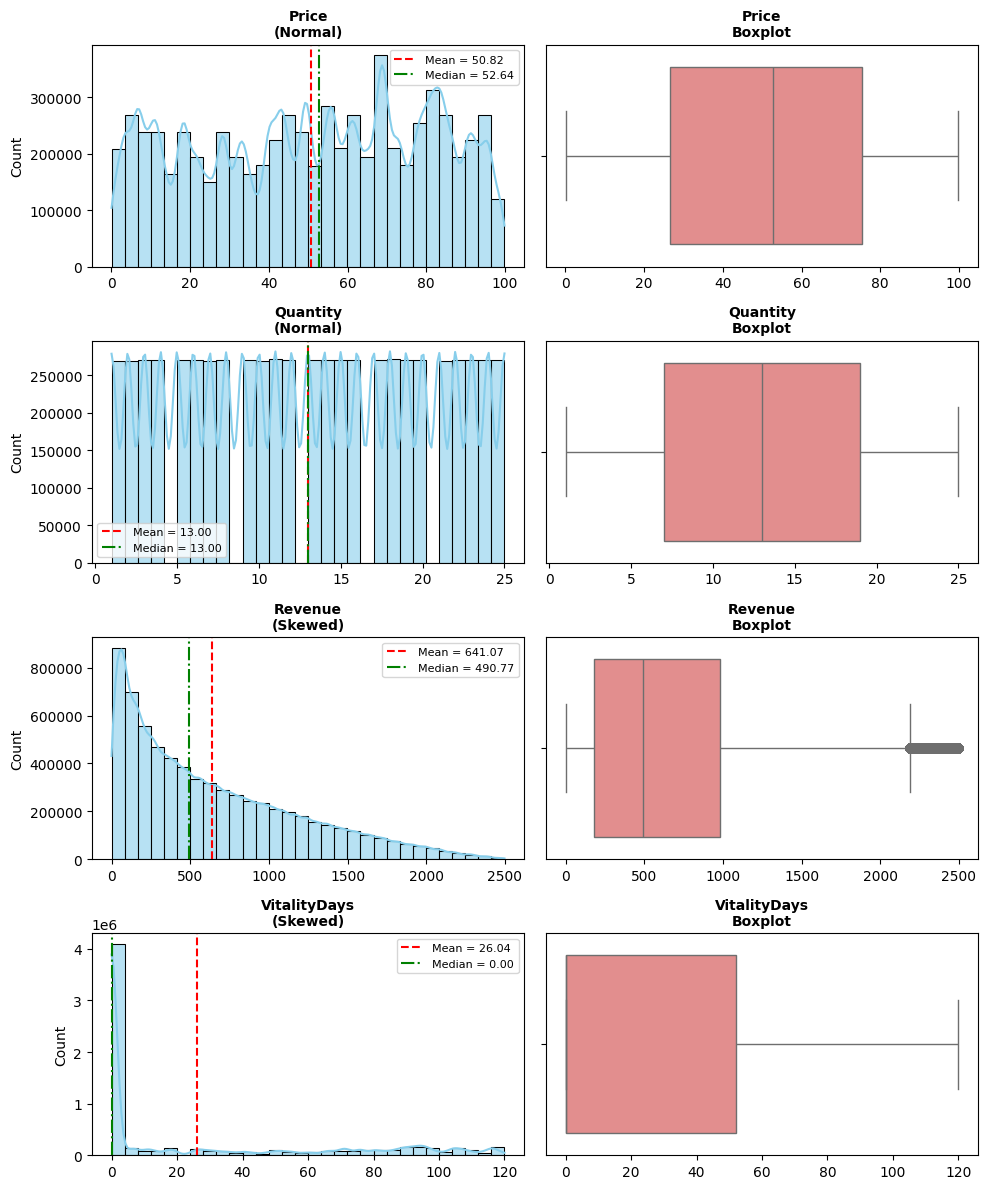

In [30]:
cols = summary.index.tolist()
n = len(cols)
ncols = 2
nrows = n

plt.figure(figsize=(10, 3 * nrows))

for i, col in enumerate(cols):
    s = df_join_numeric[col].dropna()

    # Histogram
    ax_hist = plt.subplot(nrows, ncols, i*ncols + 1)
    sns.histplot(s, bins=30, kde=True, color='skyblue', edgecolor='k', alpha=0.6, ax=ax_hist)
    mean_val = summary.loc[col, 'mean']
    median_val = summary.loc[col, 'median']
    ax_hist.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f"Mean = {mean_val:.2f}")
    ax_hist.axvline(median_val, color='green', linestyle='-.', linewidth=1.5, label=f"Median = {median_val:.2f}")

    status = summary.loc[col, 'distribusi']
    ax_hist.set_title(f"{col}\n({status})", fontsize=10, fontweight='bold')
    ax_hist.set_xlabel("")
    ax_hist.legend(fontsize=8)

    # Boxplot
    ax_box = plt.subplot(nrows, ncols, i*ncols + 2)
    sns.boxplot(x=s, color='lightcoral', orient='h', ax=ax_box)
    ax_box.set_xlabel("")
    ax_box.set_title(f"{col}\nBoxplot", fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


- Price shows a varied value from to 00 with a normal distribution and no outliers.
- Quantity is also normally distributed with a range of 1 to 25, with relatively equal amounts.
- Revenue is dominated by low-income earners, but there are many of them. Only a small percentage earn high revenue, resulting in a right-skewed distribution with some outlier revenue values, but still within a reasonable range.
- Vitality Days mostly have low food security, with only a small amount of food having long shelf life, resulting in a right-skewed distribution.

### Export Dataset

In [31]:
df_join.to_csv('EDA_dataset.csv', index=False)
df_join.head(10)

,SalesID,CustomerID,Name,Price,Quantity,Discount,Revenue,Product,Category,Class,VitalityDays,SalesDate,City,Country
0,1,27039,Susan,44.2337,7,0.0,309.63590,Vaccum Bag 10x13,Confections,High,41.0,2018-02-05 07:38:25.430,Albuquerque,United States
1,2,25011,Telly,62.5460,7,0.0,437.82200,Sardines,Grain,Low,90.0,2018-02-02 16:03:31.150,Phoenix,United States
2,3,94024,Jon,79.0184,24,0.0,1896.44160,Crab - Imitation Flakes,Produce,Medium,0.0,2018-05-03 19:31:56.880,Buffalo,United States
3,4,73966,Carol,81.3167,19,0.2,1236.01384,Smirnoff Green Apple Twist,Seafood,High,90.0,2018-04-07 14:43:55.420,Dallas,United States
4,5,32653,Terra,79.9780,9,0.0,719.80200,Coffee - Dark Roast,Poultry,Low,0.0,2018-02-12 15:37:03.940,Charlotte,United States
5,6,28663,Alexis,95.4065,8,0.0,763.25200,Ice Cream Bar - Oreo Cone,Cereals,High,5.0,2018-02-07 10:33:24.990,Wichita,United States
6,7,46674,Jeff,21.8806,12,0.0,262.56720,Muffin - Carrot Individual Wrap,Dairy,Low,0.0,2018-03-02 23:09:58.750,Lincoln,United States
7,8,12687,Whitney,57.7090,4,0.2,184.66880,Bread - Italian Roll With Herbs,Meat,Medium,0.0,2018-01-17 13:41:38.460,Baltimore,United States
8,9,89009,Tracie,18.2891,23,0.0,420.64930,Macaroons - Two Bite Choc,Dairy,Low,81.0,2018-04-27 06:19:58.570,Portland,United States
9,10,65017,Cesar,17.1914,17,0.2,233.80304,Cheese - Parmesan Grated,Confections,Low,0.0,2018-03-26 22:12:08.530,Memphis,United States


In [34]:
start_date = df_join['SalesDate'].min()
end_date = df_join['SalesDate'].max()
total_revenue = df_join['Revenue'].sum()

total_transactions = df_join.nunique()['SalesID']
total_customers = df_join.nunique()['CustomerID']
total_products = df_join.nunique()['Product']
total_categories = df_join.nunique()['Category']
total_cities = df_join.nunique()['City']
total_countries = df_join.nunique()['Country']

unique_countries = df_join['Country'].unique()
num_unique_countries = len(unique_countries)

country_summary_str = ""
if num_unique_countries == 1:
    country_summary_str = f"1 is {unique_countries[0]}"
else:
    country_summary_str = f"{num_unique_countries} unique countries: {', '.join(unique_countries)}"


print('\n' + '='*70)
print('DATASET FINAL UNDERSTANDING TO ANALYSIS')
print('='*70)

print(f'''
╔══════════════════════════════════════════════════════════════════╗
║ DATA SCOPE                                                       ║
╠══════════════════════════════════════════════════════════════════╣
║ • Total Transactions : {total_transactions:,d}
║ • Total Revenue      : ${total_revenue:,.0f}
║ • Time Period        : {start_date:%b %Y} – {end_date:%b %Y}
╚══════════════════════════════════════════════════════════════════╝

╔══════════════════════════════════════════════════════════════════╗
║ COLUMNS FINAL                                                    ║
╠══════════════════════════════════════════════════════════════════╣
║ • Columns Relevant to Analysis : {', '.join(df_join.columns.tolist())}
╚══════════════════════════════════════════════════════════════════╝

╔══════════════════════════════════════════════════════════════════╗
║ CORE ENTITIES                                                    ║
╠══════════════════════════════════════════════════════════════════╣
║ • Customers   : {total_customers:,d}
║ • Products    : {total_products:,d}
║ • Categories  : {total_categories:,d}
╚══════════════════════════════════════════════════════════════════╝

╔══════════════════════════════════════════════════════════════════╗
║ GEOGRAPHIC COVERAGE                                              ║
╠══════════════════════════════════════════════════════════════════╣
║ • Cities      : {total_cities:,d}
║ • Countries   : {country_summary_str}
╚══════════════════════════════════════════════════════════════════╝

''')


DATASET FINAL UNDERSTANDING TO ANALYSIS

╔══════════════════════════════════════════════════════════════════╗
║ DATA SCOPE                                                       ║
╠══════════════════════════════════════════════════════════════════╣
║ • Total Transactions : 6,758,125
║ • Total Revenue      : $4,332,445,646
║ • Time Period        : Jan 2018 – May 2018
╚══════════════════════════════════════════════════════════════════╝

╔══════════════════════════════════════════════════════════════════╗
║ COLUMNS FINAL                                                    ║
╠══════════════════════════════════════════════════════════════════╣
║ • Columns Relevant to Analysis : SalesID, CustomerID, Name, Price, Quantity, Discount, Revenue, Product, Category, Class, VitalityDays, SalesDate, City, Country
╚══════════════════════════════════════════════════════════════════╝

╔══════════════════════════════════════════════════════════════════╗
║ CORE ENTITIES                                     